In [1]:
from colorama import Fore, Style, init
init(autoreset=True)  # So you don’t need to reset color every time

import matplotlib.pyplot as plt

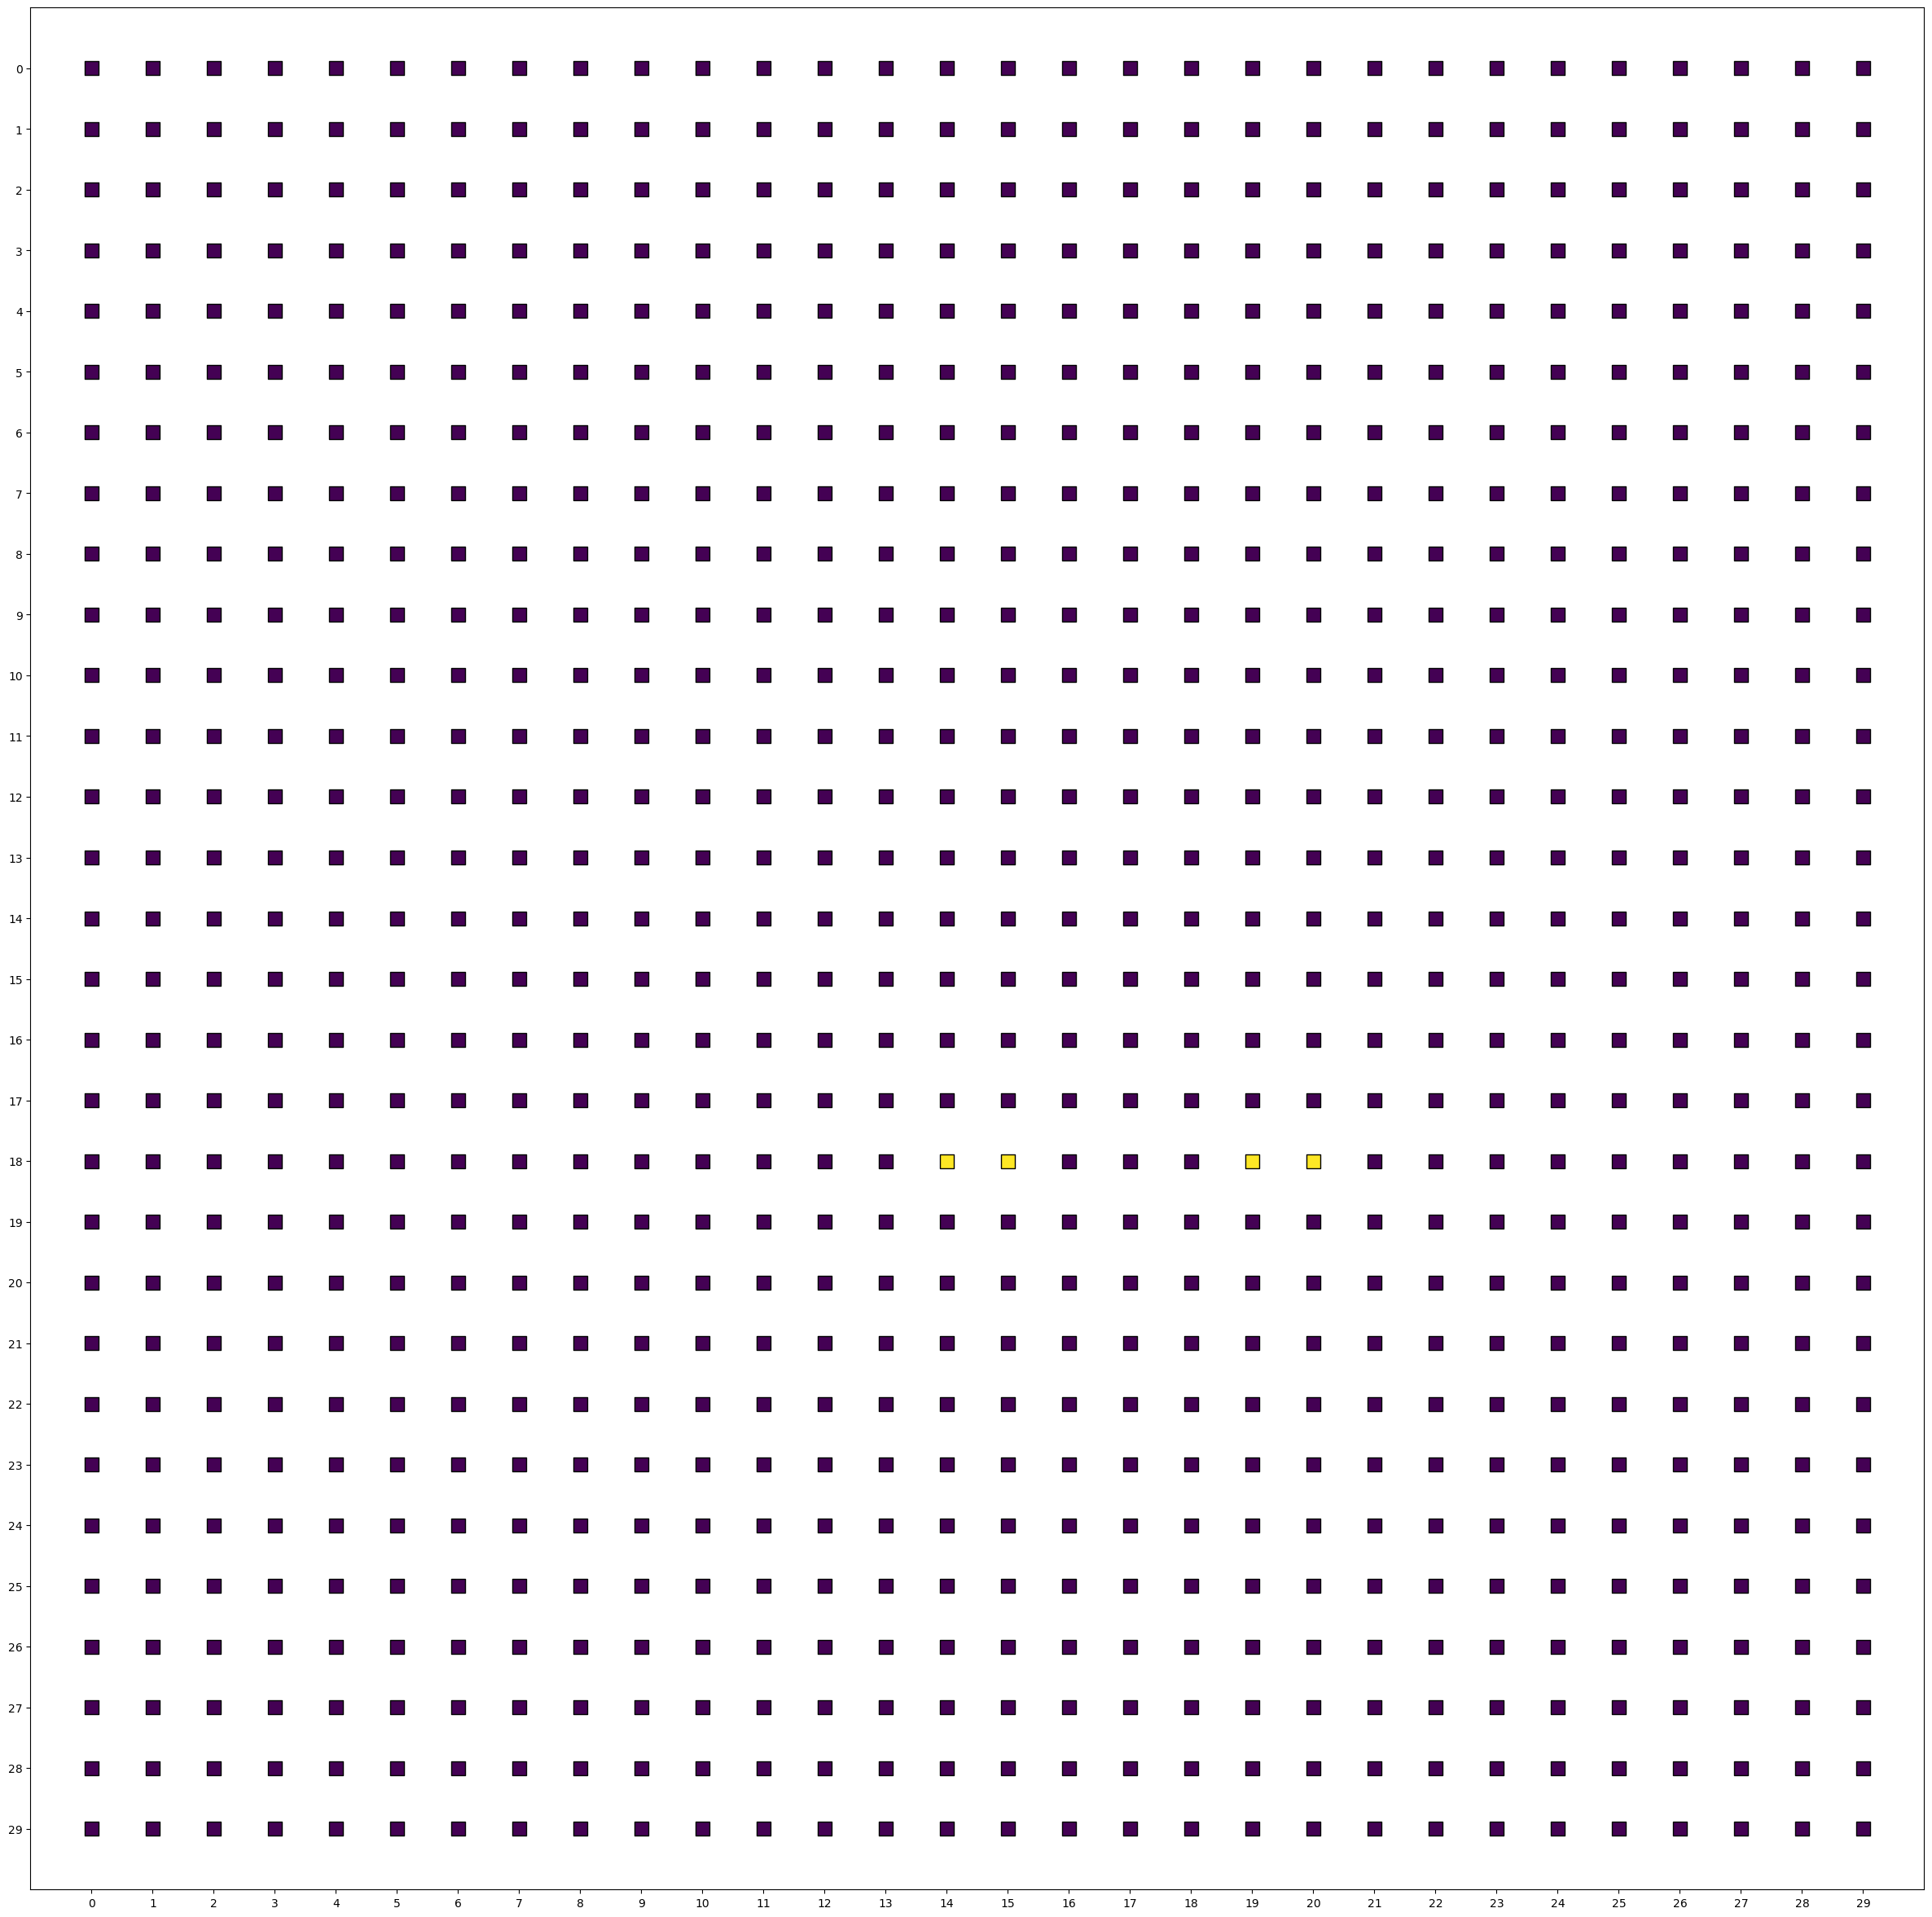

In [44]:

# Game of Life implementation in Python
class GameOfLife(object):  
    def __init__(self, x_dim, y_dim): # create a grid with number of x_Row and y_columns 
        # Initialize a 2D list with dimensions x_dim by y_dim filled with zeros.
        self.x_dim = x_dim
        self.y_dim = y_dim
        self.life_grid = [[0 for _ in range(self.y_dim)] for _ in range(self.x_dim)]
    
    def get_grid(self):
        # Implement a getter method for your grid.
        return self.life_grid

    def print_grid(self):
        # Implement a method to print out your grid in a human-readable format.
        # Use the value in self.life_grid to print the grid. with readable format
        for row in range(self.x_dim):
            for col in range(self.y_dim):
                cell_value = self.life_grid[row][col]
                print(f'{cell_value} | ', end="")
            print()
            print("- "*2*self.y_dim)

    def populate_grid(self, coord): #input cell a live 
        # Given a list of 2D coordinates (represented as tuples/lists with 2 elements each),
        # set the corresponding elements in your grid to 1.
        self.coord = coord
        for row, col in coord:
            # Đảm bảo là số liệu nhập vào nằm trong giới hạn của lưới
            if 0 <= row < self.x_dim and 0 <= col < self.y_dim:
                self.life_grid[row][col] = 1
            else: print(f"The coordinates {(row,col)} are out of bounds of the grid.")
        print()
        return self.life_grid

    def make_step(self):
        # Implement the logic to update the game state according to the rules of Conway's Game of Life.
        # Thực hiện thuật toán của trò chơi cuộc sống Conway
        sum_grid = [[0 for _ in range(self.y_dim)]for _ in range(self.x_dim)]
        for row in range(self.x_dim):
            for col in range(self.y_dim):
                sum_cell = 0
                # Initialize sum_cell to 0, After go though all neighbors (-1 to 1), the sum of neighbors will be assigned to sum_cell
                # Then sum_cell minus for the cell value and assign sum_grid[row][col]  
                # The loop go though another row, col and assgin the value to sum_cell to 0
                for i in range(-1, 2):
                    for j in range(-1,2):
                        if (0 <= row + i < self.x_dim) and ( 0 <= col + j < self.y_dim):
                            sum_cell += self.life_grid[row + i][col + j] #Sum of neighbors live cells
                sum_cell -= self.life_grid[row][col] # subtract the cell itself
                sum_grid[row][col] = sum_cell
        
        # Now update the grid based on the sum_grid
        for row in range(self.x_dim):
            for col in range(self.y_dim):
                if self.life_grid[row][col] == 1: # If the cell is alive
                    if sum_grid[row][col] < 2 or sum_grid[row][col] > 3:
                        self.life_grid[row][col] = 0
                    else: pass
                    # elif sum_grid[row][col] == 2 or sum_grid[row][col] == 3:
                    #     self.life_grid[row][col] = 1
                else: # If the cell is dead
                    if sum_grid[row][col] == 3: 
                        self.life_grid[row][col] = 1
                    else: pass
                        # self.life_grid[row][col] = 0
                        
        return self.life_grid

    def make_n_steps(self, n):
        # Implement a method that applies the make_step method n times.
        for _ in range(n):
            self.make_step()
        return self.life_grid

    def draw_grid(self):
        x = []
        y = []
        for col in range(self.y_dim):
            for row in range(self.x_dim):
                x.append(col)
                y.append(row)
        fig, ax = plt.subplots(1,1, figsize=(self.y_dim, self.x_dim))
        plt.scatter(x,y,c = self.life_grid,edgecolors = "#000000", s=150, marker='s') # Use scatter to plot the grid
        plt.xlim(-1, self.y_dim) #Do set the x-axis limit to 0 thì điểm đầu tiên sẽ trùng với trục tọa độ
        plt.ylim(-1, self.x_dim) # Do set the y-axis limit to 0 thì điểm đầu tiên sẽ trùng với trục tọa độ
        plt.xticks(range(self.y_dim)) # Set x-ticks to match the number of columns
        plt.yticks(range(self.x_dim)) # Set y-ticks to match the number of rows
        plt.gca().invert_yaxis() # Invert the y-axis to match the grid orientation
        plt.show()

game = GameOfLife(30, 30) # Create a 5x5 grid
game.populate_grid([(14, 16), (15, 16), (16, 16), (18, 16), (19, 16), (20, 16),
(16, 14), (16, 15), (16, 17), (16, 18),
(18, 14), (18, 15), (18, 17), (18, 18),
(14, 18), (15, 18), (16, 18), (18, 18), (19, 18), (20, 18)]) #assign live cells
game.make_n_steps(5) #Make 6 steps
game.draw_grid() #Render the grid after 6 steps

In [3]:
total = [[1 for _ in range(5)]for _ in range(5)]
sum_grid = [[0 for _ in range(5)]for _ in range(5)]
for row in range(5):
    for col in range(5):
        sum_cell = 0 
        # Initialize sum_cell to 0, After go though all neighbors, the sum of neighbors will be assigned to sum_cell
        # Then assign sum_cell to sum_grid[row][col]
        for i in range(-1, 2):
            for j in range(-1,2):
                if (0 <= row + i < 5) and ( 0 <= col + j < 5):
                    sum_cell += total[row + i][col + j]
        sum_grid[row][col] = sum_cell
sum_grid

[[4, 6, 6, 6, 4],
 [6, 9, 9, 9, 6],
 [6, 9, 9, 9, 6],
 [6, 9, 9, 9, 6],
 [4, 6, 6, 6, 4]]

In [4]:
x = 2
y = 2
import random
check = [(random.randint(0, x - 1), random.randint(0, y - 1)) for _ in range(1)]
check

[(1, 1)]